# stage4-1の続き

## ステップ44 パラメータをまとめるレイヤ

### 44.1 Parameterクラスの実装

In [1]:
import numpy as np

from leopard import Variable
from leopard import Parameter
from leopard import Layer

import leopard.functions as F

In [2]:
x = Variable(np.array(1.0))
p = Parameter(np.array(2.0))

y = x * p

In [3]:
print(type(x))
print(type(p))
print(type(y))

<class 'leopard.core.Variable'>
<class 'leopard.core.Parameter'>
<class 'leopard.core.Variable'>


### 44.2 Layerクラスの実装

In [4]:
layer = Layer()

layer.p1 = Parameter(np.array(1))
layer.p2 = Parameter(np.array(2))
layer.p3 = Variable(np.array(3))
layer.p4 = 'test'

print(layer._params)

{'p1', 'p2'}


In [5]:
for name in layer._params:
    print(name, layer.__dict__[name])

p1 variable(1)
p2 variable(2)


### 44.3 Linearクラスの実装
省略

### 44.4 Layerを使ったニューラルネットワークの実装

In [2]:
import leopard.layers as L

In [7]:
# dataset
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

In [8]:
l1 = L.Linear(10) # 出力サイズを指定
l2 = L.Linear(1)

In [9]:
def predict(x):
    y = l1(x)
    y = F.sigmoid(y)
    y = l2(y)
    return y

In [10]:
lr = 0.2
iters = 10000

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)

    l1.cleargrads()
    l2.cleargrads()
    loss.backward()

    for l in [l1, l2]:
        for p in l.params():
            p.data -= lr * p.grad.data
    if i % 1000 == 0:
        print(loss)

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.2372159081431807)
variable(0.20793216413350174)
variable(0.12311905720649353)
variable(0.07888166506355149)
variable(0.07655073683421637)
variable(0.0763780308623822)
variable(0.07618764131185572)


## ステップ45 レイヤをまとめるレイヤ
Layerクラスに**入れ子**の構造を追加する。つまり、Layerクラスが**別のLayer**を保持できるようにする。

In [3]:
from leopard import Layer

In [12]:
model = Layer()

model.l1 = L.Linear(5) # 出力サイズだけを指定
model.l2 = L.Linear(3)

In [13]:
# 推論を行う関数
def predict(model, x):
    y = model.l1(x)
    y = F.sigmoid(y)
    y = model.l2(y)
    return y

In [14]:
for p in model.params(): # 全てのパラメータにアクセス
    print(p)

variable([0. 0. 0.])
variable(None)
variable([0. 0. 0. 0. 0.])
variable(None)


In [15]:
model.cleargrads()

### 45.2 Modelクラス

In [4]:
from leopard.models import Model

In [17]:
# Model definition
class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)

    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y

### 45.3 Modelを使って問題を解く

In [18]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

In [19]:
# Hyperparameters
lr = 0.2
max_iter = 10000
hidden_size = 10

In [20]:
model = TwoLayerNet(hidden_size, 1)

In [21]:
for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    for p in model.params():
        p.data -= lr * p.grad.data
    if i % 1000 == 0:
        print(loss)

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.2372159081431807)
variable(0.20793216413350174)
variable(0.12311905720649353)
variable(0.07888166506355149)
variable(0.07655073683421637)
variable(0.0763780308623822)
variable(0.07618764131185572)


### 45.4 MLP(Multi-Layer-Perceptron)クラス
今後のことを見据えて、**N層**のネットワークを作るクラスを実装する。

In [5]:
from leopard.models import MLP

In [23]:
model = MLP((10, 1)) # 2層

In [24]:
for p in model.params():
    print(p.name, p)

b variable([0. 0. 0. 0. 0. 0. 0. 0. 0. 0.])
W variable(None)
b variable([0.])
W variable(None)


In [25]:
model = MLP((10, 20, 30, 40, 1)) # 5層

In [26]:
for p in model.params():
    print(p.name, p)

b variable([0.])
W variable(None)
b variable([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
          0. 0. 0. 0. 0. 0.])
W variable(None)
b variable([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.])
W variable(None)
b variable([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
          0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.])
W variable(None)
b variable([0. 0. 0. 0. 0. 0. 0. 0. 0. 0.])
W variable(None)


## ステップ46　Optimizerによるパラメータ更新

### 46.1　Optimizerクラス
省略

### 46.2　SGDクラスの実装
省略

### 46.3　SGDクラスを使って問題を解く

In [6]:
from leopard import optimizers

In [28]:
lr = 0.2
max_iter = 10000
hidden_size = 10

In [29]:
model = MLP((hidden_size, 1))
optimizer = optimizers.SGD(lr).setup(model)

In [30]:
for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    optimizer.update() # パラメータの更新を一気に行える。
    if i % 1000 == 0:
        print(loss)

variable(1.1827762997377618)
variable(0.24721518059487607)
variable(0.2404155854412563)
variable(0.22093915204680056)
variable(0.14778105835316568)
variable(0.08156167479972622)
variable(0.07643859324328743)
variable(0.07616811473964549)
variable(0.07599896851444594)
variable(0.07584688031253686)


### 46.4 SGD以外の最適化手法
Momentumの実装をしてみる。Momentumは以下の式で表される。

$$

\begin{aligned}

\boldsymbol v_{t+1} & \leftarrow \alpha \boldsymbol v_t - \eta \frac{\partial L}{\partial \boldsymbol W} \\

\boldsymbol W_{t+1} & \leftarrow \boldsymbol W_t + \boldsymbol v_{t+1}

\end{aligned}

$$

通常、$\alpha=0.9, \ \eta = 0.01$を初期値とすることが多い。

## ステップ47 ソフトマックス関数と交差エントロピー誤差

### 47.1 スライス操作のための関数
スライスした場合の逆伝播は、スライスした場所にのみ勾配を加算すれば良い。

In [31]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.get_item(x, 1)
print(y)

variable([4 5 6])


In [32]:
y.backward()
print(x.grad)

variable([[0 0 0]
          [1 1 1]])


In [33]:
indices = np.array([0, 0, 1])
y = F.get_item(x, indices)
print(y)

variable([[1 2 3]
          [1 2 3]
          [4 5 6]])


In [34]:
x.cleargrad()

y = x[1]
y.backward()
print(y)
print(x.grad)

x.cleargrad()

y = x[:, :2]
y.backward()
print(y)
print(x.grad)


variable([4 5 6])
variable([[0 0 0]
          [1 1 1]])
variable([[1 2]
          [4 5]])
variable([[1 1 0]
          [1 1 0]])


### 47.2 ソフトマックス関数
モデルの出力を**確率**に変換するとき、以下のソフトマックス関数を用いられる。

$$

\begin{aligned}

p_k &= \frac{\exp(y_k)}{\sum_{i=1}^{n} \exp(y_i)} \\

\\

\frac{\partial p_i}{\partial y_j} &= \left \{

\begin{array}{ll}

p_i (1 - p_j) & (i = j) \\

-p_i p_j & (i \neq j)

\end{array}

\right.

\end{aligned}

$$

これにより、$0 \leq p_i \leq 1, \ \  p_1 + p_2 + \cdots + p_n = 1$となり、$(p_1, \ p_2, \ \cdots , \ p_n)$は確率として解釈できる。

In [35]:
model = MLP((10, 3))

x = np.array([[0.2, -0.4]])
y = model(x)
print(y)

variable([[-0.93787012 -0.03804002  0.02768597]])


In [36]:
from leopard import as_variable

def softmax1d(x):
    x = as_variable(x)
    y = F.exp(x)
    sum_y = F.sum(y)
    return y / sum_y

In [37]:
p = softmax1d(y)
print(y)
print(p)
print(F.sum(p))

variable([[-0.93787012 -0.03804002  0.02768597]])
variable([[0.16432685 0.40411016 0.431563  ]])
variable(1.0)


- 補足①

ソフトマックス関数は指数関数の計算を行うので、その値が容易に大きくもしくは小さくなり得る。よって、オーバーフロー対策を行うのが一般的である。この時、変換するベクトルの要素の最大値を引くことでオーバーフロー対策を行える。

$$

p_k = \frac{\exp \Bigl( y_k - \max(\boldsymbol y) \Bigr)}{\sum_{i=1}^{n} \exp \Bigl( y_k - \max(\boldsymbol y)) \Bigr)}

$$

```Py
# 値が大きい
x = np.array([[1000, 1010, 880]])
p_x = softmax1d(x)
print(p_x)
```

variable([[nan nan nan]])

In [39]:
# オーバーフロー対策
x = x - x.max(axis=1)
p_x_ = softmax1d(x)
print(p_x_)

variable([[4.53978687e-05 9.99954602e-01 3.48094881e-57]])


### 47.3 交差エントロピー誤差
多値分類を行う際、モデルの出力値は確率となる。従って、モデルの確率分布と、教師信号の確率分布がどれだけ似ているかを表す交差エントロピーを使う。

$$

\begin{aligned}

L &= - \sum_{k} t_k \log p_k \\

\frac{\partial L}{\partial \boldsymbol p} &= 

(- \frac{t_1}{p_1} \quad - \frac{t_2}{p_2} \quad \cdots \quad - \frac{t_n}{p_n})

\end{aligned}

$$

例えば、$\boldsymbol t = (0, 0, 1), \ \boldsymbol p = (p_0, p_1, p_2)$の場合、

$$ 

L = - \log \boldsymbol p [t]

$$

ここで、$\boldsymbol p [t]$は、ベクトル$\boldsymbol p$から$t$番目の要素を抜き出すことを意味する。

また、一般的に、$\boldsymbol p$は、ソフトマックス関数を通るので、ソフトマックス関数と交差エントロピーの合成関数について考えてみる。さらに、バッチ処理を考慮し、バッチごとの平均を取るとする。バッチサイズを$N$とすると、

$$

L = - \frac{1}{N} \sum_{n=1}^{N} \sum_{k=1}^{K} t_{nk} log \Biggl( \frac{\exp(y_{nk})}{\sum_{i=1}^{m} \exp(y_{ni})} \Biggr) \\

$$

となる。次に逆伝播を計算する。簡単のため$N=1$における逆伝播を計算してみる。

$$

\begin{aligned}

L &= - \sum_{k} t_k \log p_k \\

\Leftrightarrow &= - \sum_{k} t_k \log \Biggl( \frac{\exp(y_{k})}{\sum_{j=1}^{n} \exp(y_{j})} \Biggr)\\

\Leftrightarrow &= - \Biggl( \sum_{k} t_k y_k - \sum_{k} t_k \log \Bigl( \sum_{j=1}^{n} \exp(y_{j}) \Bigr) \Biggr) \\

\Leftrightarrow &= -  \sum_{k} t_k y_k + \log \Bigl( \sum_{j=1}^{n} \exp(y_{j}) \Bigr) \quad

\Bigl( \because \ \sum_{k} t_k = 1. \ \forall k>0, \ \exist a \in \R, \ \sum_{j=1}^{n} \exp(y_{j}) = a \Bigr) \\

\\

\frac{\partial L}{\partial y_k} &= -t_k + \frac{\exp(y_k)}{\sum_{j=1}^{n} \exp(y_{j})} \\

\Leftrightarrow &= p_{k} - t_{k} \\

\\

\therefore \frac{\partial L}{\partial \boldsymbol y} &= \frac{1}{N} (\boldsymbol p - \boldsymbol t)

\end{aligned}

$$

つまり、モデルの出力値をsoftmax関数に通した値から、教師信号（one_hotもしくは任意の確率分布）を引いて、バッチサイズで割れば良い。

In [40]:
x = np.array([[0.2, -0.4], [0.3, 0.5], [1.3, -3.2], [2.1, 0.3]])
t = np.array([2, 0, 1, 0])

In [41]:
y = model(x)
p = F.softmax_simple(y)
print(y)
print(p)

loss = F.softmax_cross_entropy_simple(y, t)
loss.backward()
print(loss)

variable([[-0.93787012 -0.03804002  0.02768597]
          [-0.95582361  0.04111775  0.0598178 ]
          [-1.06499792 -0.05136239  0.15584895]
          [-1.20215596  0.1657937   0.41317402]])
variable([[0.16432685 0.40411016 0.431563  ]
          [0.1545329  0.4187811  0.42668601]
          [0.13994512 0.38563289 0.47442199]
          [0.1004335  0.39443148 0.50513502]])
variable(1.48970474715864)


## ステップ48 多値分類
### 48.1 スパイラル・データセット

In [7]:
import leopard
import matplotlib.pyplot as plt

In [42]:
x, t = leopard.datasets.get_spiral(train=True)

In [43]:
print(x.shape, t.shape)

(300, 2) (300,)


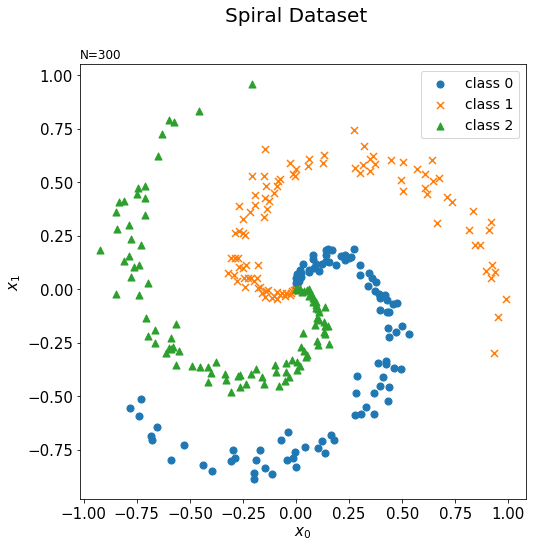

In [63]:
# 各クラスのマーカーを指定
markers = ['o', 'x', '^']

# 作図
plt.figure(figsize=(8, 8))
for i in range(3):
    plt.scatter(x[t == i, 0], x[t == i, 1], marker=markers[i], 
                s=50, label='class ' + str(i)) # データセット
plt.xlabel('$x_0$', fontsize=15) # x軸ラベル
plt.ylabel('$x_1$', fontsize=15) # y軸ラベル
plt.suptitle('Spiral Dataset', fontsize=20) # 図全体のタイトル
plt.title('N=' + str(len(x)), loc='left') # タイトル
plt.tick_params(axis='both', labelsize=15)
plt.legend(fontsize=14) # 凡例
plt.show()

### 48.2 学習用のコード

In [52]:
# ハイパーパラメータの設定
max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

In [53]:
# データの読み込み/モデル・オプティマイザの生成
x, t = leopard.datasets.get_spiral(train=True)
model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

In [54]:
import math

data_size = len(x)
max_iter = math.ceil(data_size / batch_size) # 小数点の切り上げ

In [55]:
train_loss = []

for epoch in range(max_epoch):
    # データセットのインデックスのシャッフル
    index = np.random.permutation(data_size)
    sum_loss = 0

    for i in range(max_iter):
        batch_index = index[i * batch_size:(i + 1) * batch_size]
        batch_x = x[batch_index]
        batch_t = t[batch_index]

        # 勾配の算出/パラメータの更新
        y = model(batch_x)
        loss = F.softmax_cross_entropy(y, batch_t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(batch_t)

    # エポックごとに学習経過を出力
    avg_loss = sum_loss / data_size
    train_loss.append(avg_loss)
    
    if epoch % 30 == 0:
        print('epoch %d, loss %.2f' % (epoch + 1, avg_loss))

epoch 1, loss 1.13
epoch 31, loss 0.71
epoch 61, loss 0.64
epoch 91, loss 0.46
epoch 121, loss 0.36
epoch 151, loss 0.25
epoch 181, loss 0.20
epoch 211, loss 0.17
epoch 241, loss 0.15
epoch 271, loss 0.14


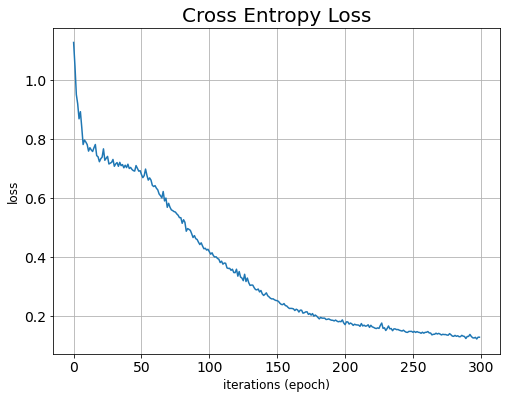

In [65]:
# 作図
plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(train_loss)), train_loss, label='train') # 損失
plt.xlabel('iterations (epoch)', fontsize=12) # x軸ラベル
plt.ylabel('loss', fontsize=12) # y軸ラベル
plt.title('Cross Entropy Loss', fontsize=20) # タイトル
plt.grid() # グリッド線
plt.tick_params(axis='both', labelsize='14')
plt.show()

In [57]:
# Plot boundary area the model predict
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]

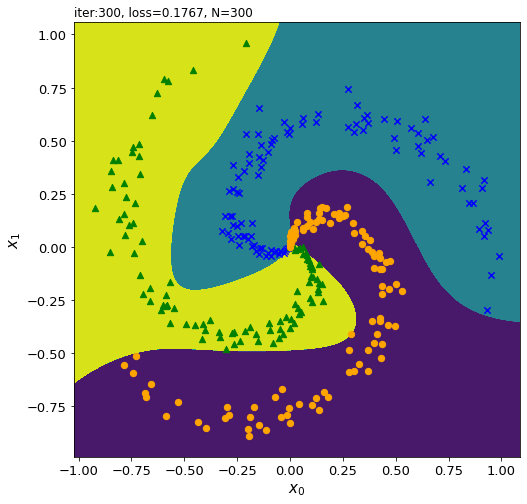

In [71]:
with leopard.no_grad():
    score = model(X)
predict_cls = np.argmax(score.data, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z)

# Plot data points of the dataset
N, CLS_NUM = 100, 3
markers = ['o', 'x', '^']
colors = ['orange', 'blue', 'green']
labels = ['class 0', 'class 1', 'class 2']
for i in range(len(x)):
    c = t[i]
    plt.scatter(x[i][0], x[i][1], s=40,  marker=markers[c], c=colors[c])

plt.tick_params(axis='both', labelsize=13)
plt.title('iter:' + str(max_epoch) + 
          ', loss=' + str(np.round(loss.data, 5)) + 
          ', N=' + str(len(x)), loc='left') # タイトル

plt.xlabel('$x_0$', fontsize=15) # x軸ラベル
plt.ylabel('$x_1$', fontsize=15) # y軸ラベル
plt.show()

## ステップ49　Datasetクラスと前処理

### 49.1 - 49.3
省略

### 49.4 学習用のコード

In [72]:
max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

In [73]:
train_set = leopard.datasets.Spiral(train=True)
model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

data_size = len(train_set)
max_iter = math.ceil(data_size / batch_size)

In [74]:
for epoch in range(max_epoch):
    # Shuffle index for data
    index = np.random.permutation(data_size)
    sum_loss = 0

    for i in range(max_iter):
        # Create minibatch
        batch_index = index[i * batch_size:(i + 1) * batch_size]
        batch = [train_set[i] for i in batch_index]
        batch_x = np.array([example[0] for example in batch])
        batch_t = np.array([example[1] for example in batch])

        y = model(batch_x)
        loss = F.softmax_cross_entropy(y, batch_t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(batch_t)

    # Print loss
    avg_loss = sum_loss / data_size
    if epoch % 30 == 0:
        print('epoch %d, loss %.2f' % (epoch + 1, avg_loss))

epoch 1, loss 1.13
epoch 31, loss 0.71
epoch 61, loss 0.64
epoch 91, loss 0.46
epoch 121, loss 0.36
epoch 151, loss 0.25
epoch 181, loss 0.20
epoch 211, loss 0.17
epoch 241, loss 0.15
epoch 271, loss 0.14


## ステップ５０　ミニバッチを取り出すDataLoader

### 50.1 イテレータとは
省略

### 50.2 DataLoaderを使う

In [8]:
from leopard.datasets import Spiral
from leopard import DataLoader

In [9]:
batch_size = 10
max_epoch = 1

train_set = Spiral(train=True)
test_set = Spiral(train=False)

train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size)

for epoch in range(max_epoch):
    for x, t in train_loader:
        print(x.shape, t.shape) # x, tは訓練データ
        break
    
    # エポックの終わりにテストデータを取り出す
    for x, t in test_loader:
        print(x.shape, t.shape) # x, tはテストデータ
        break

(10, 2) (10,)
(10, 2) (10,)


### 50.3　accuracy関数の実装
正解率を求める関数を実装する。

In [10]:
y = np.array([[0.2, 0.8, 0], [0.1, 0.9, 0], [0.8, 0.1, 0.1]])
t = np.array([1, 2, 0])
acc = F.accuracy(y, t)
print(acc)

variable(0.6666666666666666)


### 50.4 スパイラル・データセットの学習コード
DataLoaderクラスとaccuracy関数を使って学習データを行ってみる。

In [8]:
max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

In [9]:
train_set = Spiral(train=True)
test_set = Spiral(train=False)

train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size)

model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

In [10]:
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []

for epoch in range(max_epoch):
    sum_loss, sum_acc = 0, 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)

    train_loss.append(sum_loss / len(train_set))
    train_acc.append(sum_acc / len(train_set))

    if epoch % 50 == 0:
        print('epoch: {}'.format(epoch+1))
        print('train loss: {:.4f}, accuracy: {:.4f}'.format(
            sum_loss / len(train_set), sum_acc / len(train_set)))

    sum_loss, sum_acc = 0, 0
    with leopard.no_grad():
        for x, t in test_loader:
            y = model(x)
            loss = F.softmax_cross_entropy(y, t)
            acc = F.accuracy(y, t)
            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)

    valid_loss.append(sum_loss / len(test_set))
    valid_acc.append(sum_acc / len(test_set))
    
    if epoch % 50 == 0:
        print('test loss: {:.4f}, accuracy: {:.4f}'.format(
            sum_loss / len(test_set), sum_acc / len(test_set)))

epoch: 1
train loss: 1.1135, accuracy: 0.3333
test loss: 1.0628, accuracy: 0.3367
epoch: 51
train loss: 0.6902, accuracy: 0.6100
test loss: 0.7020, accuracy: 0.6567
epoch: 101
train loss: 0.3471, accuracy: 0.8600
test loss: 0.3577, accuracy: 0.8567
epoch: 151
train loss: 0.1966, accuracy: 0.9267
test loss: 0.2294, accuracy: 0.9200
epoch: 201
train loss: 0.1664, accuracy: 0.9467
test loss: 0.1886, accuracy: 0.9300
epoch: 251
train loss: 0.1290, accuracy: 0.9467
test loss: 0.1642, accuracy: 0.9567


In [11]:
loss_result = [train_loss, valid_loss]
acc_result = [train_acc, valid_acc]
results = [loss_result, acc_result]

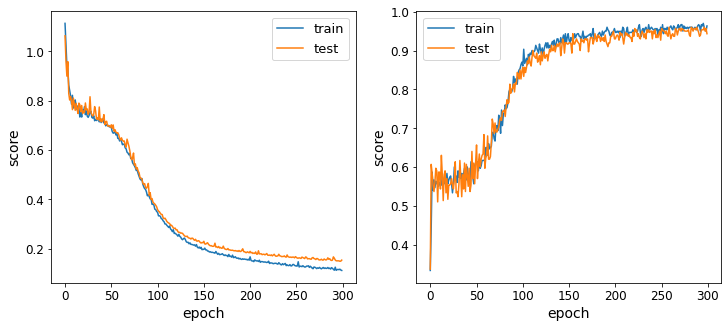

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, result in zip(axes, results):
    ax.plot(np.arange(len(result[0])), result[0], label='train')
    ax.plot(np.arange(len(result[1])), result[1], label='test')
    ax.legend(fontsize=13)
    ax.tick_params(axis='both', labelsize=12)
    ax.set_xlabel('epoch', fontsize=14)
    ax.set_ylabel('score', fontsize=14)

## ステップ51　MNISTの学習 

### 51.1 MNISTデータセット
transformの引数を指定しなければ、自動的に入力データが0.0から1.0の間の値になる。

In [9]:
train_set = leopard.datasets.MNIST(train=True, transform=None)
test_set = leopard.datasets.MNIST(train=False, transform=None)

Downloading: train-images-idx3-ubyte.gz
[##############################] 100.00% Done
Downloading: train-labels-idx1-ubyte.gz
[##############################] 100.00% Done
Downloading: t10k-images-idx3-ubyte.gz
[##############################] 100.00% Done
Downloading: t10k-labels-idx1-ubyte.gz
[##############################] 100.00% Done


In [10]:
print(len(train_set))
print(len(test_set))

60000
10000


In [11]:
x, t = train_set[0]
print(type(x), x.shape)
print(t)

<class 'numpy.ndarray'> (1, 28, 28)
5


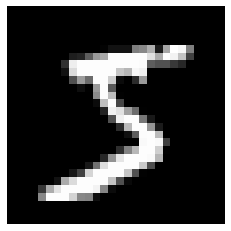

label: 5


In [12]:
plt.imshow(x.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()
print(f'label: {t}')

### 51.2 MNISTの学習

In [21]:
max_epoch = 5
batch_size = 100
hidden_size = 1000

In [22]:
train_set = leopard.datasets.MNIST(train=True)
test_set = leopard.datasets.MNIST(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

In [23]:
model = MLP((hidden_size, 10))
optimizer = optimizers.SGD().setup(model)

In [24]:
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []

for epoch in range(max_epoch):
    sum_loss, sum_acc = 0, 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)

    train_loss.append(sum_loss / len(train_set))
    train_acc.append(sum_acc / len(train_set))

    print('epoch: {}'.format(epoch+1))
    print('train loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(train_set), sum_acc / len(train_set)))

    sum_loss, sum_acc = 0, 0
    with leopard.no_grad():
        for x, t in test_loader:
            y = model(x)
            loss = F.softmax_cross_entropy(y, t)
            acc = F.accuracy(y, t)
            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)

    valid_loss.append(sum_loss / len(test_set))
    valid_acc.append(sum_acc / len(test_set))

    print('test loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(test_set), sum_acc / len(test_set)))

epoch: 1
train loss: 1.9074, accuracy: 0.5673
test loss: 1.5256, accuracy: 0.7668
epoch: 2
train loss: 1.2735, accuracy: 0.7782
test loss: 1.0310, accuracy: 0.8131
epoch: 3
train loss: 0.9152, accuracy: 0.8215
test loss: 0.7819, accuracy: 0.8484
epoch: 4
train loss: 0.7324, accuracy: 0.8435
test loss: 0.6531, accuracy: 0.8562
epoch: 5
train loss: 0.6296, accuracy: 0.8552
test loss: 0.5717, accuracy: 0.8710


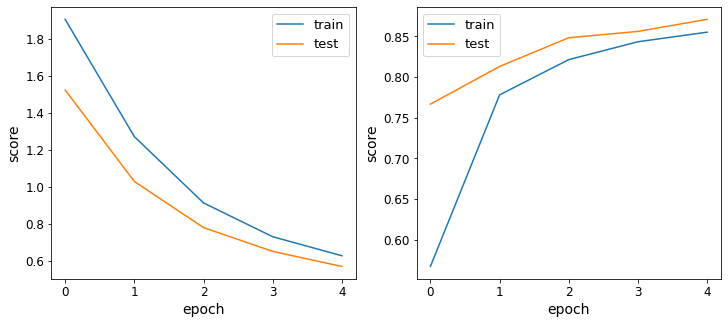

In [25]:
loss_result = [train_loss, valid_loss]
acc_result = [train_acc, valid_acc]
results = [loss_result, acc_result]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, result in zip(axes, results):
    ax.plot(np.arange(len(result[0])), result[0], label='train')
    ax.plot(np.arange(len(result[1])), result[1], label='test')
    ax.legend(fontsize=13)
    ax.tick_params(axis='both', labelsize=12)
    ax.set_xlabel('epoch', fontsize=14)
    ax.set_ylabel('score', fontsize=14)

### 51.3 モデルの改良

MLPクラスの活性化関数は、デフォルトでシグモイド関数になっている。<br>
これをReLU(Rectified Linear Unit)に変える。ReLUは以下の式になる。

$$

\begin{aligned}

h(x) &= \left \{

\begin{array}{ll}

x  & (x > 0) \\

0 & (x \leq 0)

\end{array}

\right.

\\

\\

\frac{\partial h}{\partial x} &= \left \{

\begin{array}{ll}

1  & (x > 0) \\

0 & (x \leq 0)

\end{array}

\right.

\end{aligned}

$$

前節よりレイヤの数を１つ増やして3層のネットワークにし、活性化関数をReLUとしてモデルを構築する。
また、最適化手法をSGDからAdamに変えてみる。

- 参考 <br>
Adamの更新式は以下のようになる。MomentumとRMSPropを組み合わせて、振動を抑制する。
Momentumは移動平均、RMSPropは勾配が急な部分ほど学習率を下げる。

$$

\begin{aligned}

g_t &= \nabla_{w} f(w_{t-1}) \\

m_t &= \beta_{1}m_{t-1}+(1-\beta_{1})g_t \qquad \mathrm{Momentum} \\

v_t &= \beta_{2}v_{t-1}+(1-\beta_{2})g_t^2 \qquad\; \mathrm{RMSProp} \\

\hat{m_t} &= \frac{m_t}{1-\beta_{1}^t} \\

\hat{v_t} &= \frac{v_t}{1-\beta_{2}^t} \\

w_t &= w_{t-1} - \eta \frac{\hat{m_t}}{\sqrt{\hat{v_t} + \epsilon}} \\

\newline

\eta=0.001, \ \beta_{1}&=0.9, \ \beta_{2}=0.999, \ \epsilon=1e-08

\end{aligned}

$$

In [26]:
# model = MLP((hidden_size, 10))
# optimizer = optimizers.SGD().setup(model)

model = MLP((hidden_size, hidden_size, 10), activation=F.relu)
optimizer = optimizers.Adam().setup(model)

In [27]:
train_relu_loss, valid_relu_loss = [], []
train_relu_acc, valid_relu_acc = [], []

for epoch in range(max_epoch):
    sum_loss, sum_acc = 0, 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)

    train_relu_loss.append(sum_loss / len(train_set))
    train_relu_acc.append(sum_acc / len(train_set))

    print('epoch: {}'.format(epoch+1))
    print('train loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(train_set), sum_acc / len(train_set)))

    sum_loss, sum_acc = 0, 0
    with leopard.no_grad():
        for x, t in test_loader:
            y = model(x)
            loss = F.softmax_cross_entropy(y, t)
            acc = F.accuracy(y, t)
            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)

    valid_relu_loss.append(sum_loss / len(test_set))
    valid_relu_acc.append(sum_acc / len(test_set))

    print('test loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(test_set), sum_acc / len(test_set)))

epoch: 1
train loss: 0.1924, accuracy: 0.9409
test loss: 0.0844, accuracy: 0.9746
epoch: 2
train loss: 0.0722, accuracy: 0.9774
test loss: 0.0734, accuracy: 0.9764
epoch: 3
train loss: 0.0494, accuracy: 0.9841
test loss: 0.0628, accuracy: 0.9816
epoch: 4
train loss: 0.0342, accuracy: 0.9892
test loss: 0.0663, accuracy: 0.9802
epoch: 5
train loss: 0.0301, accuracy: 0.9896
test loss: 0.0675, accuracy: 0.9800


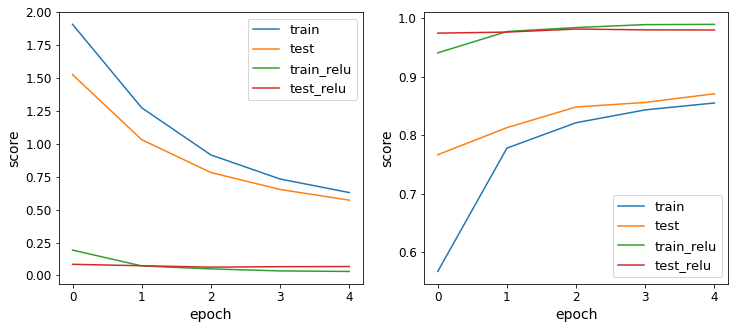

In [30]:
loss_result = [train_loss, valid_loss]
acc_result = [train_acc, valid_acc]
results = [loss_result, acc_result]

loss_relu = [train_relu_loss, valid_relu_loss]
acc_relu = [train_relu_acc, valid_relu_acc]
results_relu = [loss_relu, acc_relu]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, result, result_relu in zip(axes, results, results_relu):
    ax.plot(np.arange(len(result[0])), result[0], label='train')
    ax.plot(np.arange(len(result[1])), result[1], label='test')
    ax.plot(np.arange(len(result_relu[0])), result_relu[0], label='train_relu')
    ax.plot(np.arange(len(result_relu[1])), result_relu[1], label='test_relu')
    ax.legend(fontsize=13)
    ax.tick_params(axis='both', labelsize=12)
    ax.set_xlabel('epoch', fontsize=14)
    ax.set_ylabel('score', fontsize=14)

# 第４ステージ　終了